# dE/dx plots

In [57]:
import ROOT
from glob import glob
from tqdm import tqdm_notebook

ROOT.gStyle.SetPalette(ROOT.kLightTemperature)
ROOT.gStyle.SetNumberContours(99)
ROOT.gStyle.SetOptStat(0)

In [58]:
s = glob("data_files/mc_bnb/1/output*.root")
chain = ROOT.TChain("robertoana/pandoratree")
for filename in s:
    chain.Add(filename)

h_chi2_proton = ROOT.TH1F("Proton", ";Track #chi^{2};N. Entries / 2", 100, 0, 200)
h_chi2_muon = ROOT.TH1F("Muon", ";Track #chi^{2};N. Entries / 2", 100, 0, 200)

h_dedx_photon = ROOT.TH1F("Photon", ";dE/dx [MeV/cm];N. Entries / 0.1 MeV/cm", 70, 0.2, 7.2)
h_dedx_electron = ROOT.TH1F("Electron", ";dE/dx [MeV/cm];N. Entries / 0.1 MeV/cm", 70, 0.2, 7.2)
h_dedx_pitch = ROOT.TH2F("dE/dx vs. Pitch", ";dE/dx [MeV/cm];Pitch [cm]", 70, 0.2, 7.2, 60, 0.3, 3.3)

for i in tqdm_notebook(range(chain.GetEntries())):
    chain.GetEntry(i)
    if not chain.passed:
        continue
        
    for i_tr in range(chain.n_tracks):
        if chain.track_pid_chipr[i_tr] > 0:
            if chain.matched_tracks[i_tr] == 2212:
                h_chi2_proton.Fill(chain.track_pid_chipr[i_tr])
            elif abs(chain.matched_tracks[i_tr]) == 13:
                h_chi2_muon.Fill(chain.track_pid_chipr[i_tr])

    for i_sh in range(chain.n_showers):
        if chain.shower_dEdx[i_sh][2] > 0:
            if chain.matched_showers[i_sh] == 22:
                h_dedx_photon.Fill(chain.shower_dQdx[i_sh][2] * chain.shower_dQdx_cali[i_sh][2] * 3.85e-5)
                h_dedx_pitch.Fill(chain.shower_dQdx[i_sh][2] * chain.shower_dQdx_cali[i_sh][2] * 3.85e-5, chain.shower_pitches[i_sh][2])
            elif chain.matched_showers[i_sh] == 13:
                h_dedx_electron.Fill(chain.shower_dQdx[i_sh][2] * chain.shower_dQdx_cali[i_sh][2] * 3.85e-5)


Warning in <TROOT::Append>: Replacing existing TH1: Proton (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Muon (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Photon (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Electron (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: dE/dx vs. Pitch (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_dedx
Info in <TCanvas::Print>: pdf file plots/dedx.pdf has been created


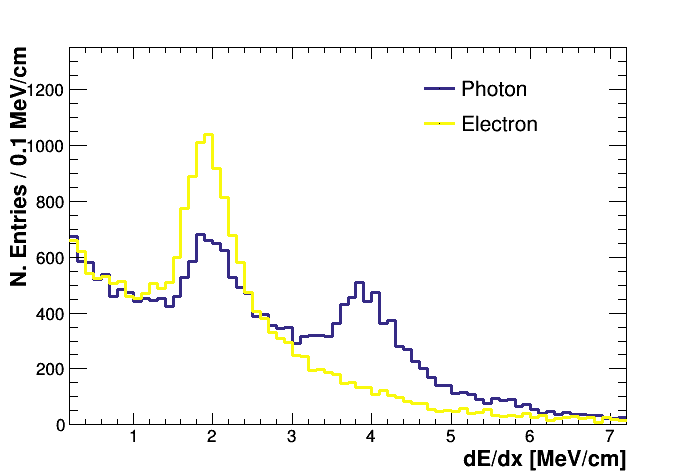

In [19]:
c_dedx = ROOT.TCanvas("c_dedx", "Shower dE/dx")
h_dedx_photon.Draw("hist plc")
h_dedx_photon.SetLineWidth(3)
h_dedx_electron.SetLineWidth(3)

h_dedx_electron.Draw("hist plc same")
h_dedx_photon.SetMaximum(h_dedx_electron.GetMaximum() * 1.3)
h_dedx_photon.GetYaxis().SetTitleOffset(0.92)

c_dedx.Draw()
c_dedx.BuildLegend(0.6, 0.7, 0.85, 0.85)
c_dedx.SaveAs("plots/dedx.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_chi2
Info in <TCanvas::Print>: pdf file plots/chi2.pdf has been created


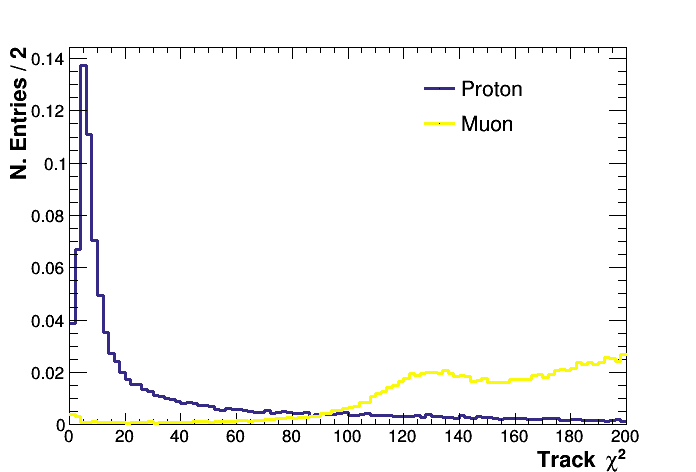

In [59]:
c_chi2 = ROOT.TCanvas("c_chi2", "Chi2")
h_chi2_proton.Scale(1 / h_chi2_proton.Integral())
h_chi2_muon.Scale(1 / h_chi2_muon.Integral())
h_chi2_proton.SetLineWidth(3)
h_chi2_muon.SetLineWidth(3)
ROOT.gStyle.SetPalette(ROOT.kBird)
h_chi2_proton.Draw("hist plc")
h_chi2_muon.Draw("hist plc same")
h_chi2_proton.GetYaxis().SetTitleOffset(0.92)
c_chi2.BuildLegend(0.6, 0.7, 0.85, 0.85)
c_chi2.Draw()
c_chi2.SaveAs("plots/chi2.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_dedx_pitch
Info in <TCanvas::Print>: pdf file plots/dedx_vs_pitch.pdf has been created


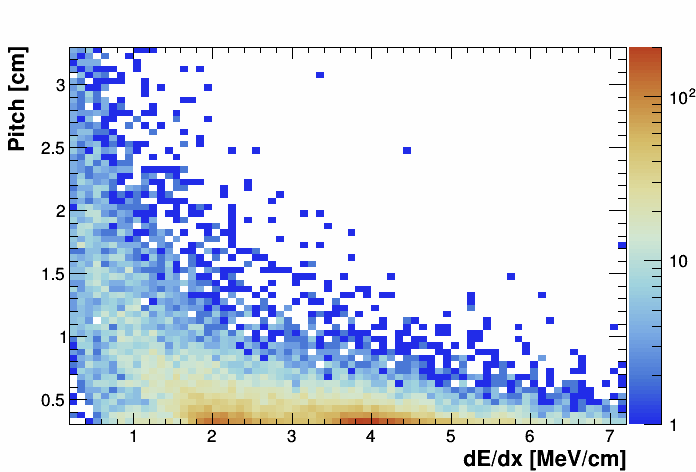

In [67]:
c_dedx_pitch = ROOT.TCanvas("c_dedx_pitch", "dE/dx vs. Pitch")
h_dedx_pitch.Draw("colz")
h_dedx_pitch.GetYaxis().SetTitleOffset(0.92)
c_dedx_pitch.SetLogz()
c_dedx_pitch.Draw()
c_dedx_pitch.SaveAs("plots/dedx_vs_pitch.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: range
Info in <TCanvas::Print>: pdf file plots/range.pdf has been created


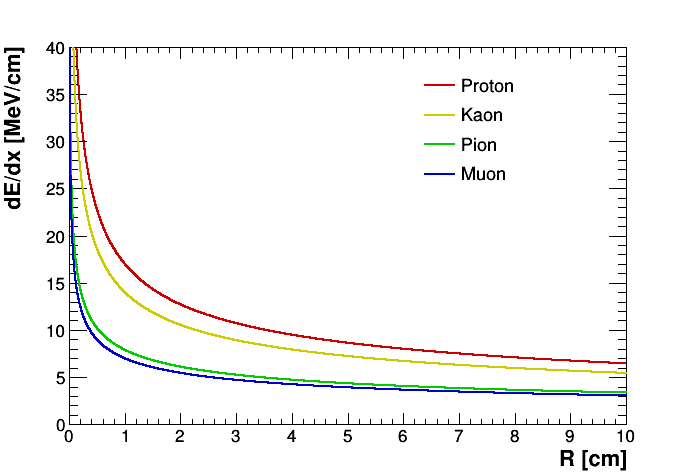

In [61]:
c_range = ROOT.TCanvas("range")
f_proton = ROOT.TF1("Proton", "17*x^(-0.42)", 0, 10)
f_pion = ROOT.TF1("Pion", "7.9*x^(-0.37)", 0, 10)
f_muon = ROOT.TF1("Muon", "7.0*x^(-0.36)", 0, 10)
f_kaon = ROOT.TF1("Kaon", "14*x^(-0.41)", 0, 10)
f_proton.SetNpx(10000)
f_pion.SetNpx(10000)
f_muon.SetNpx(10000)
f_kaon.SetNpx(10000)

f_proton.Draw()
f_pion.Draw("same")
f_muon.Draw("same")
f_kaon.Draw("same")
f_pion.SetLineColor(ROOT.kGreen + 1)
f_kaon.SetLineColor(ROOT.kYellow + 1)
f_muon.SetLineColor(ROOT.kBlue + 1)
f_proton.GetYaxis().SetTitle("dE/dx [MeV/cm]")
f_proton.GetXaxis().SetTitle("R [cm]")
f_proton.GetYaxis().SetRangeUser(0, 40)
c_range.Draw()
leg = ROOT.TLegend(0.6, 0.6, 0.85, 0.85)
leg.AddEntry(f_proton, "Proton", "l")
leg.AddEntry(f_kaon, "Kaon", "l")
leg.AddEntry(f_pion, "Pion", "l")
leg.AddEntry(f_muon, "Muon", "l")
leg.Draw()
c_range.SaveAs("plots/range.pdf")